<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/final_tomato_research_xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai import *
from fastai.imports import *

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
path = Path('/content/drive/My Drive/research_plant_diseases/plant_data_fastai')
# View all files in director
path.ls()

[PosixPath('/content/drive/My Drive/research_plant_diseases/plant_data_fastai/train'),
 PosixPath('/content/drive/My Drive/research_plant_diseases/plant_data_fastai/test'),
 PosixPath('/content/drive/My Drive/research_plant_diseases/plant_data_fastai/val'),
 PosixPath('/content/drive/My Drive/research_plant_diseases/plant_data_fastai/models')]

In [4]:
data = ImageDataBunch.from_folder(path, train='train', valid='val',test='test', ds_tfms=get_transforms(do_flip=True), size=256, bs=50, num_workers=4)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'] 10
14523 1812


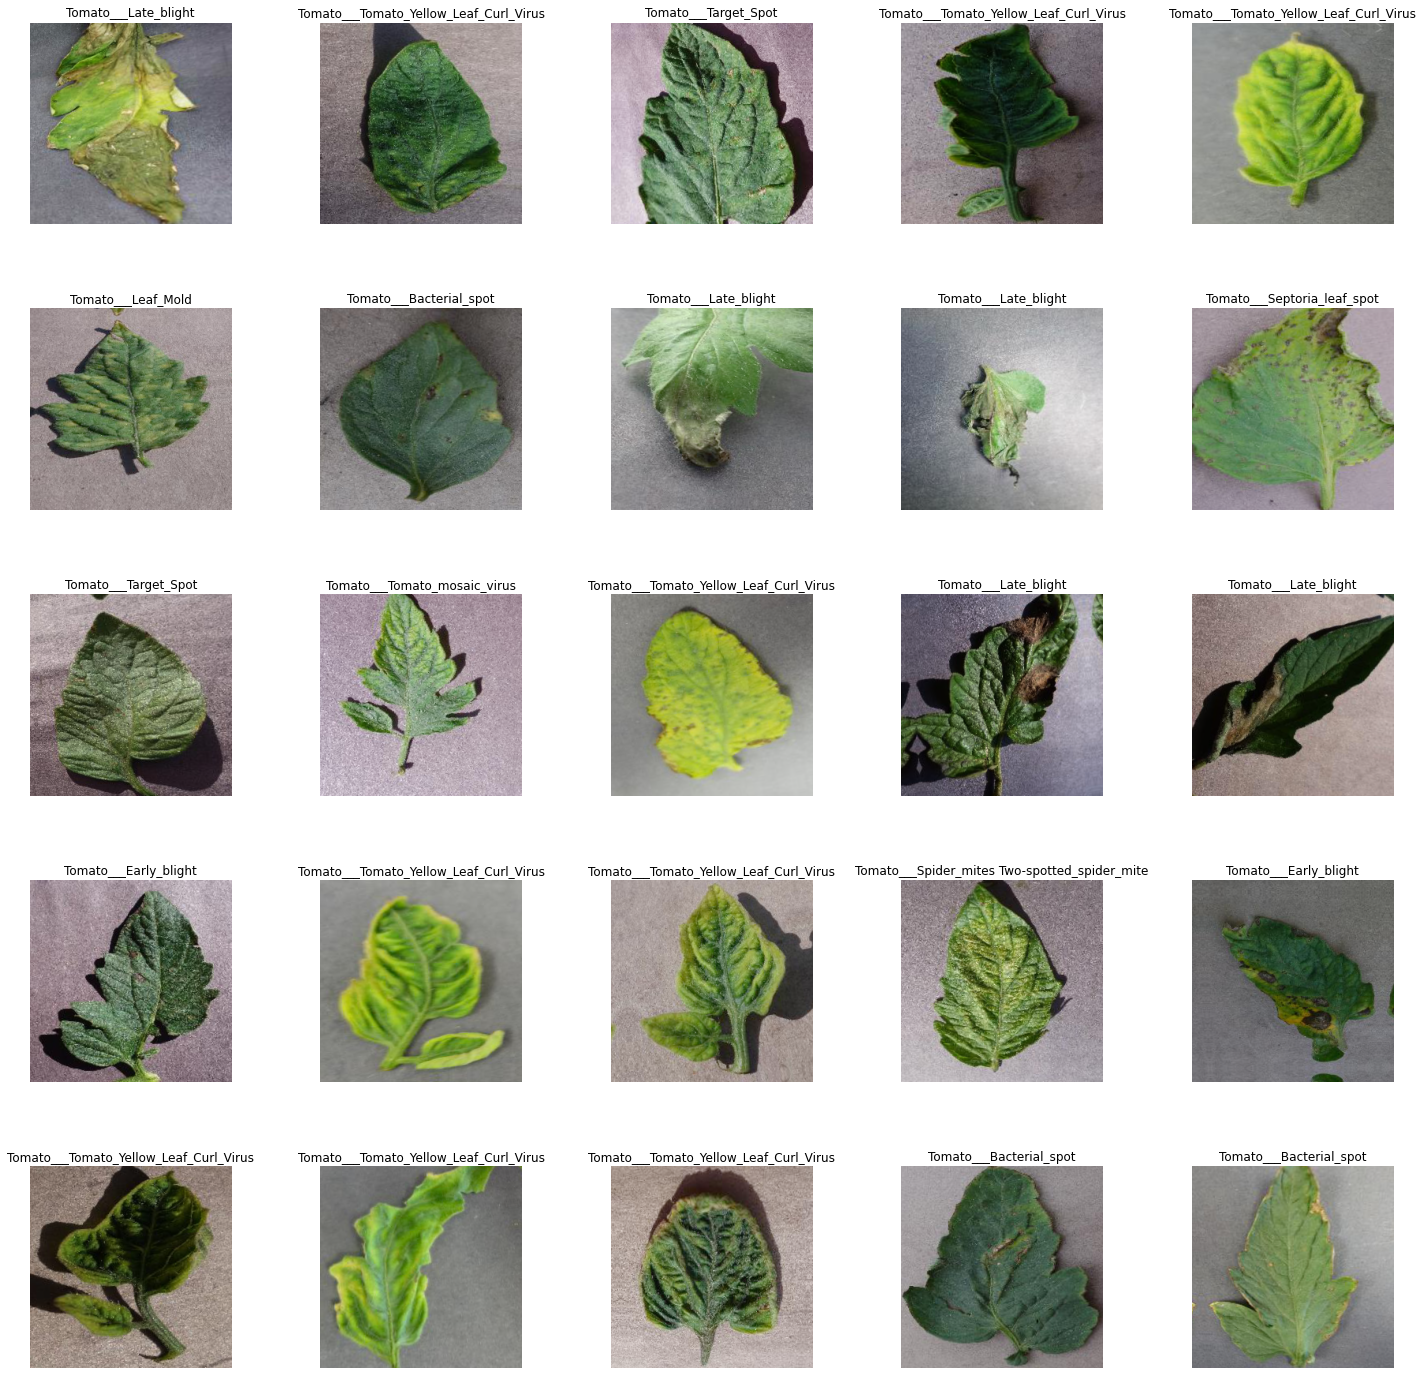

In [5]:
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

In [5]:
!pip install pretrainedmodels
import pretrainedmodels

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60964 sha256=67c2b861c2c24afb86839f34dd4bb0c459661eb699b0b4e83b9a8c990fa1bdc1
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [6]:
from fastai.metrics import accuracy
model = pretrainedmodels.__dict__['xception'](pretrained='imagenet')
learn = create_cnn(data, lambda x: model, metrics=accuracy)

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [7]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (14523 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Early_blight,Tomato___Early_blight,Tomato___Early_blight,Tomato___Early_blight,Tomato___Early_blight
Path: /content/drive/My Drive/research_plant_diseases/plant_data_fastai;

Valid: LabelList (1812 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Leaf_Mold,Tomato___Leaf_Mold,Tomato___Leaf_Mold,Tomato___Leaf_Mold,Tomato___Leaf_Mold
Path: /content/drive/My Drive/research_plant_diseases/plant_data_fastai;

Test: LabelList (1825 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/research_plant_diseases/plant_data_fastai, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, 

In [8]:
import torch
torch.cuda.empty_cache()

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
defaults.device = torch.device('cuda') 
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-03
Min loss divided by 10: 2.09E-02


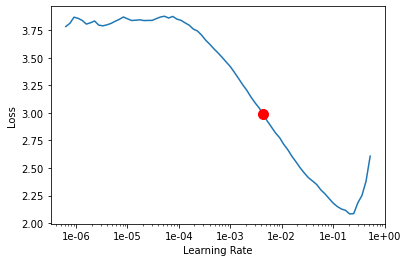

In [11]:
learn.recorder.plot(suggestion=True)

In [12]:
olr = learn.recorder.min_grad_lr
olr

0.004365158322401656

In [13]:
learn.fit_one_cycle(5, slice(olr))

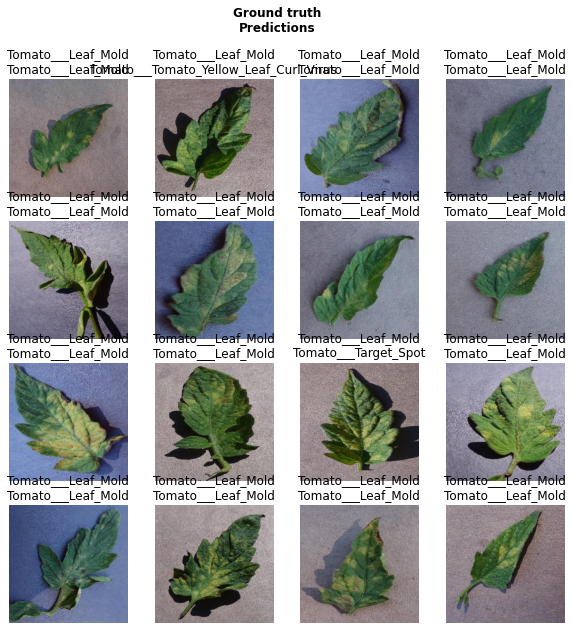

In [14]:
learn.show_results(rows=4, figsize=(10,10))
learn.save('xceptionfirstcycle')
data_diagrams_xception = ClassificationInterpretation.from_learner(learn)

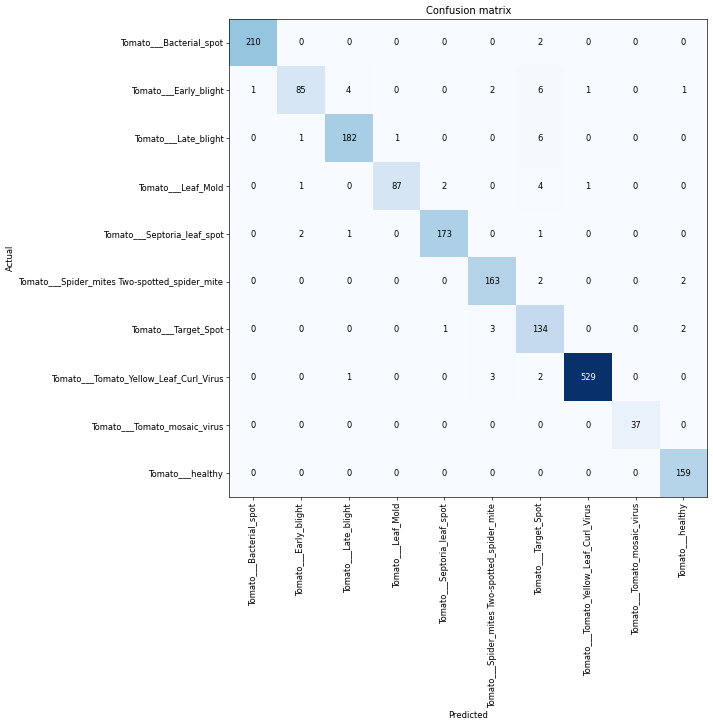

In [15]:
data_diagrams_xception.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
data_diagrams_xception.most_confused()

[('Tomato___Early_blight', 'Tomato___Target_Spot', 6),
 ('Tomato___Late_blight', 'Tomato___Target_Spot', 6),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 4),
 ('Tomato___Leaf_Mold', 'Tomato___Target_Spot', 4),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 3),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  3),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', 2),
 ('Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 2),
 ('Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 2),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 2),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy', 2),
 ('Tomato___Target_Spot', 'Tomato___healthy', 2),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 2),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 1),
 ('Tomato___

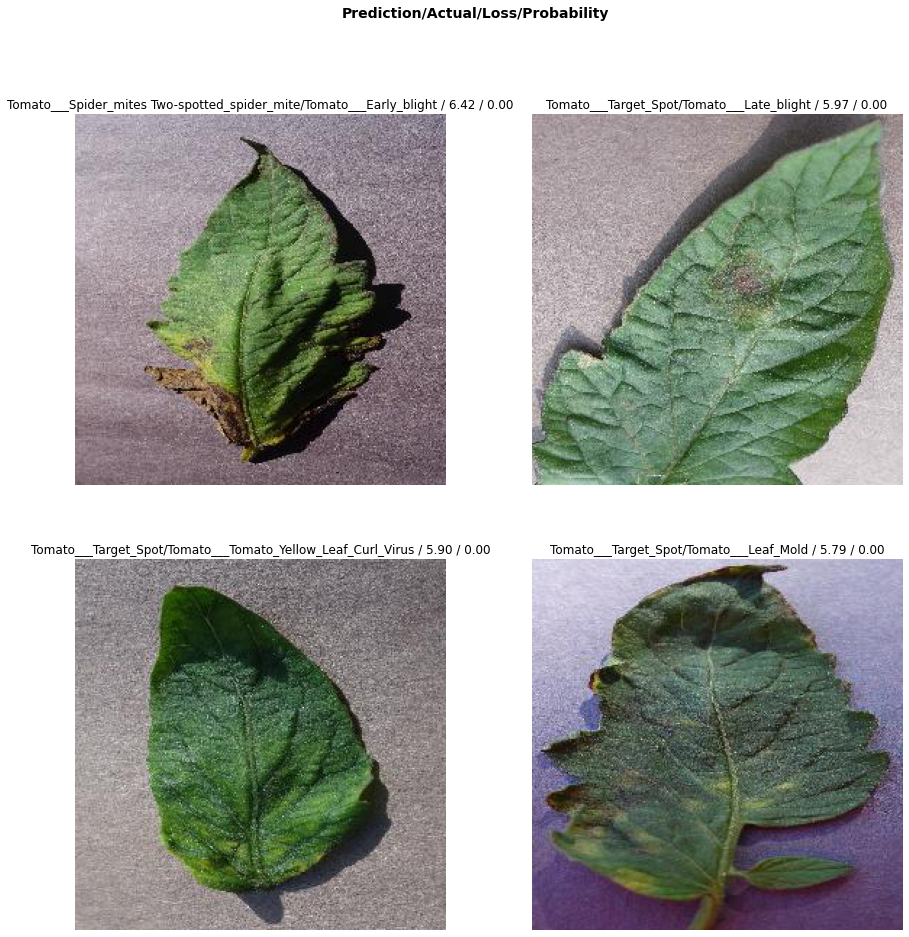

In [17]:
data_diagrams_xception.plot_top_losses(4, figsize=(15,15))

In [18]:
log_preds, y = learn.TTA()
accuracy(log_preds, y)

tensor(0.9774)

In [19]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(log_preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9983761682242991


In [20]:
learn.validate(data.valid_dl)


[0.08870744, tensor(0.9708)]

In [21]:
pred = log_preds.numpy()


In [23]:
y_pred=[]
for i in pred:
  y_pred.append(np.argmax(i))
y_actual = y.numpy()
y_actual = list(y_actual)

In [24]:

from sklearn.metrics import classification_report
print(classification_report(y_actual,y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       212
           1       0.98      0.90      0.94       100
           2       0.98      0.97      0.98       190
           3       0.99      0.96      0.97        95
           4       0.99      0.99      0.99       177
           5       0.96      0.97      0.96       167
           6       0.90      0.93      0.92       140
           7       1.00      1.00      1.00       535
           8       1.00      0.97      0.99        37
           9       0.96      1.00      0.98       159

    accuracy                           0.98      1812
   macro avg       0.97      0.97      0.97      1812
weighted avg       0.98      0.98      0.98      1812



In [25]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("Recall = ",recall_score(y_actual,y_pred,average='weighted'))
print("Precision = ",precision_score(y_actual,y_pred,average='weighted'))
print("F1 score = ",f1_score(y_actual,y_pred,average='weighted'))

Recall =  0.9773730684326711
Precision =  0.9776440810242103
F1 score =  0.9773427610613022
